In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv.gz")

In [32]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


# Data Preparation
## Check for Missing Values

In [33]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

## Convert Object Data types into Numerical Data types

In [47]:
if "sex" in df.columns:
    one_hot = pd.get_dummies(df["sex"], prefix = 'Is_')
    df_ = pd.concat([df, one_hot], axis = 1)
    df = df_.drop(["sex"], axis = 1)

In [48]:
df

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,Is__Female,Is__Male
0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,80.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,0,1
1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,82.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0,1
2,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,70.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0,1
3,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,87.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0,1
4,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,82.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,80.0,...,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0,1
991342,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,83.0,...,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0,1
991343,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,70.0,...,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1,0
991344,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,74.0,...,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0,1


In [45]:
if "DRK_YN" in df.columns:    
    df = df.drop(["DRK_YN"], axis = 1)

    

## Standardising

In [19]:
pipeline = Pipeline([
    ('standardiser', StandardScaler())
])

In [49]:
Standard_df = pipeline.fit_transform(df)

In [50]:
Standard_df

array([[-0.88951382,  0.83587354,  0.93620986, ..., -0.74296486,
        -0.9397885 ,  0.9397885 ],
       [-1.24209002,  1.91311698,  1.33575488, ...,  1.70050947,
        -0.9397885 ,  0.9397885 ],
       [-0.53693763,  0.29725182,  0.93620986, ..., -0.74296486,
        -0.9397885 ,  0.9397885 ],
       ...,
       [-0.53693763, -0.77999162, -1.0615152 , ...,  1.70050947,
         1.06406921, -1.06406921],
       [-1.59466621,  1.37449526, -0.26242517, ..., -0.74296486,
        -0.9397885 ,  0.9397885 ],
       [ 0.16821475, -0.2413699 ,  0.53666485, ...,  1.70050947,
        -0.9397885 ,  0.9397885 ]])

# Model

## Rough Model

In [92]:
kmeans = KMeans(n_clusters =2,  n_init = 10, random_state = 42)
kmeans_pred = kmeans.fit_predict(Standard_df)
wcss = kmeans.inertia_

In [95]:
centroids = kmeans.cluster_centers_

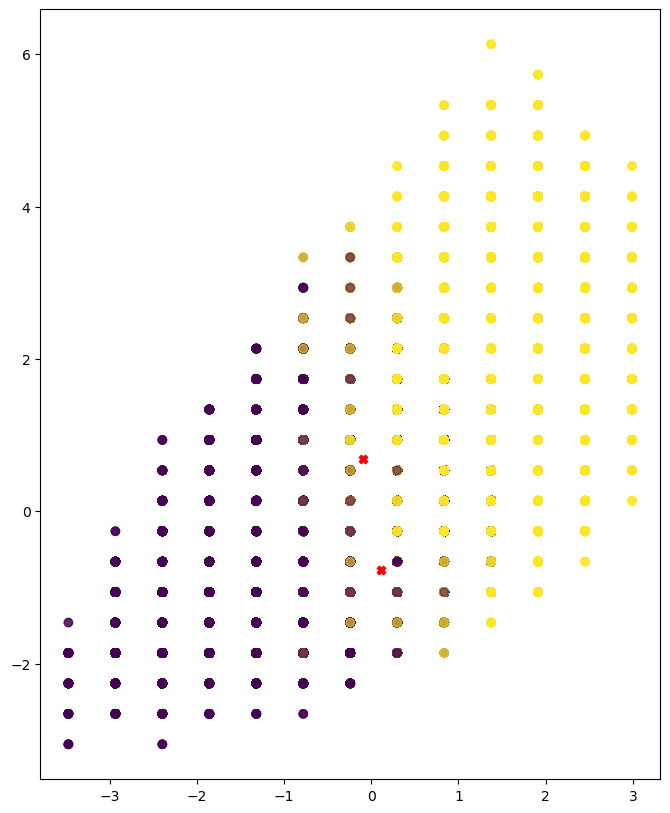

In [96]:
plt.figure(figsize = (8,10))

plt.scatter(Standard_df[:,1], Standard_df[:, 2], c = kmeans_pred, cmap = "viridis", alpha = 0.6)
plt.scatter(centroids[:,0], centroids[:, 1], c = "red", marker = 'X')

The graph seems cluttered so Decided to try plot with the sample.

In [107]:
np.random.seed(42)
sample_indices = np.random.choice(Standard_df.shape[0], replace = False, size = 10000)
sample_df = Standard_df[sample_indices]
sample_preds = kmeans_pred[sample_indices]

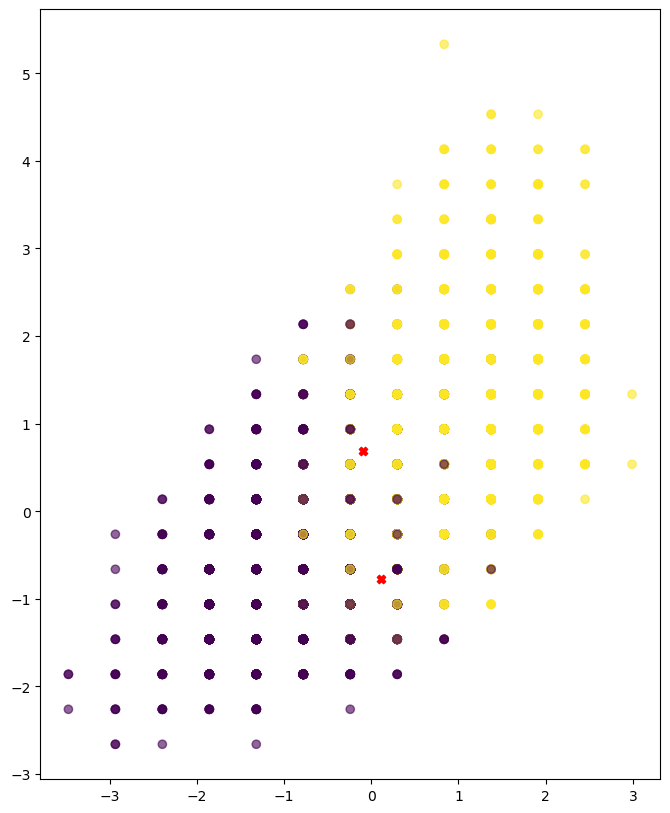

In [109]:
plt.figure(figsize = (8,10))

plt.scatter(sample_df[:,1], sample_df[:, 2], c = sample_preds, cmap = "viridis", alpha = 0.6)
plt.scatter(centroids[:,0], centroids[:, 1], c = "red", marker = 'X')


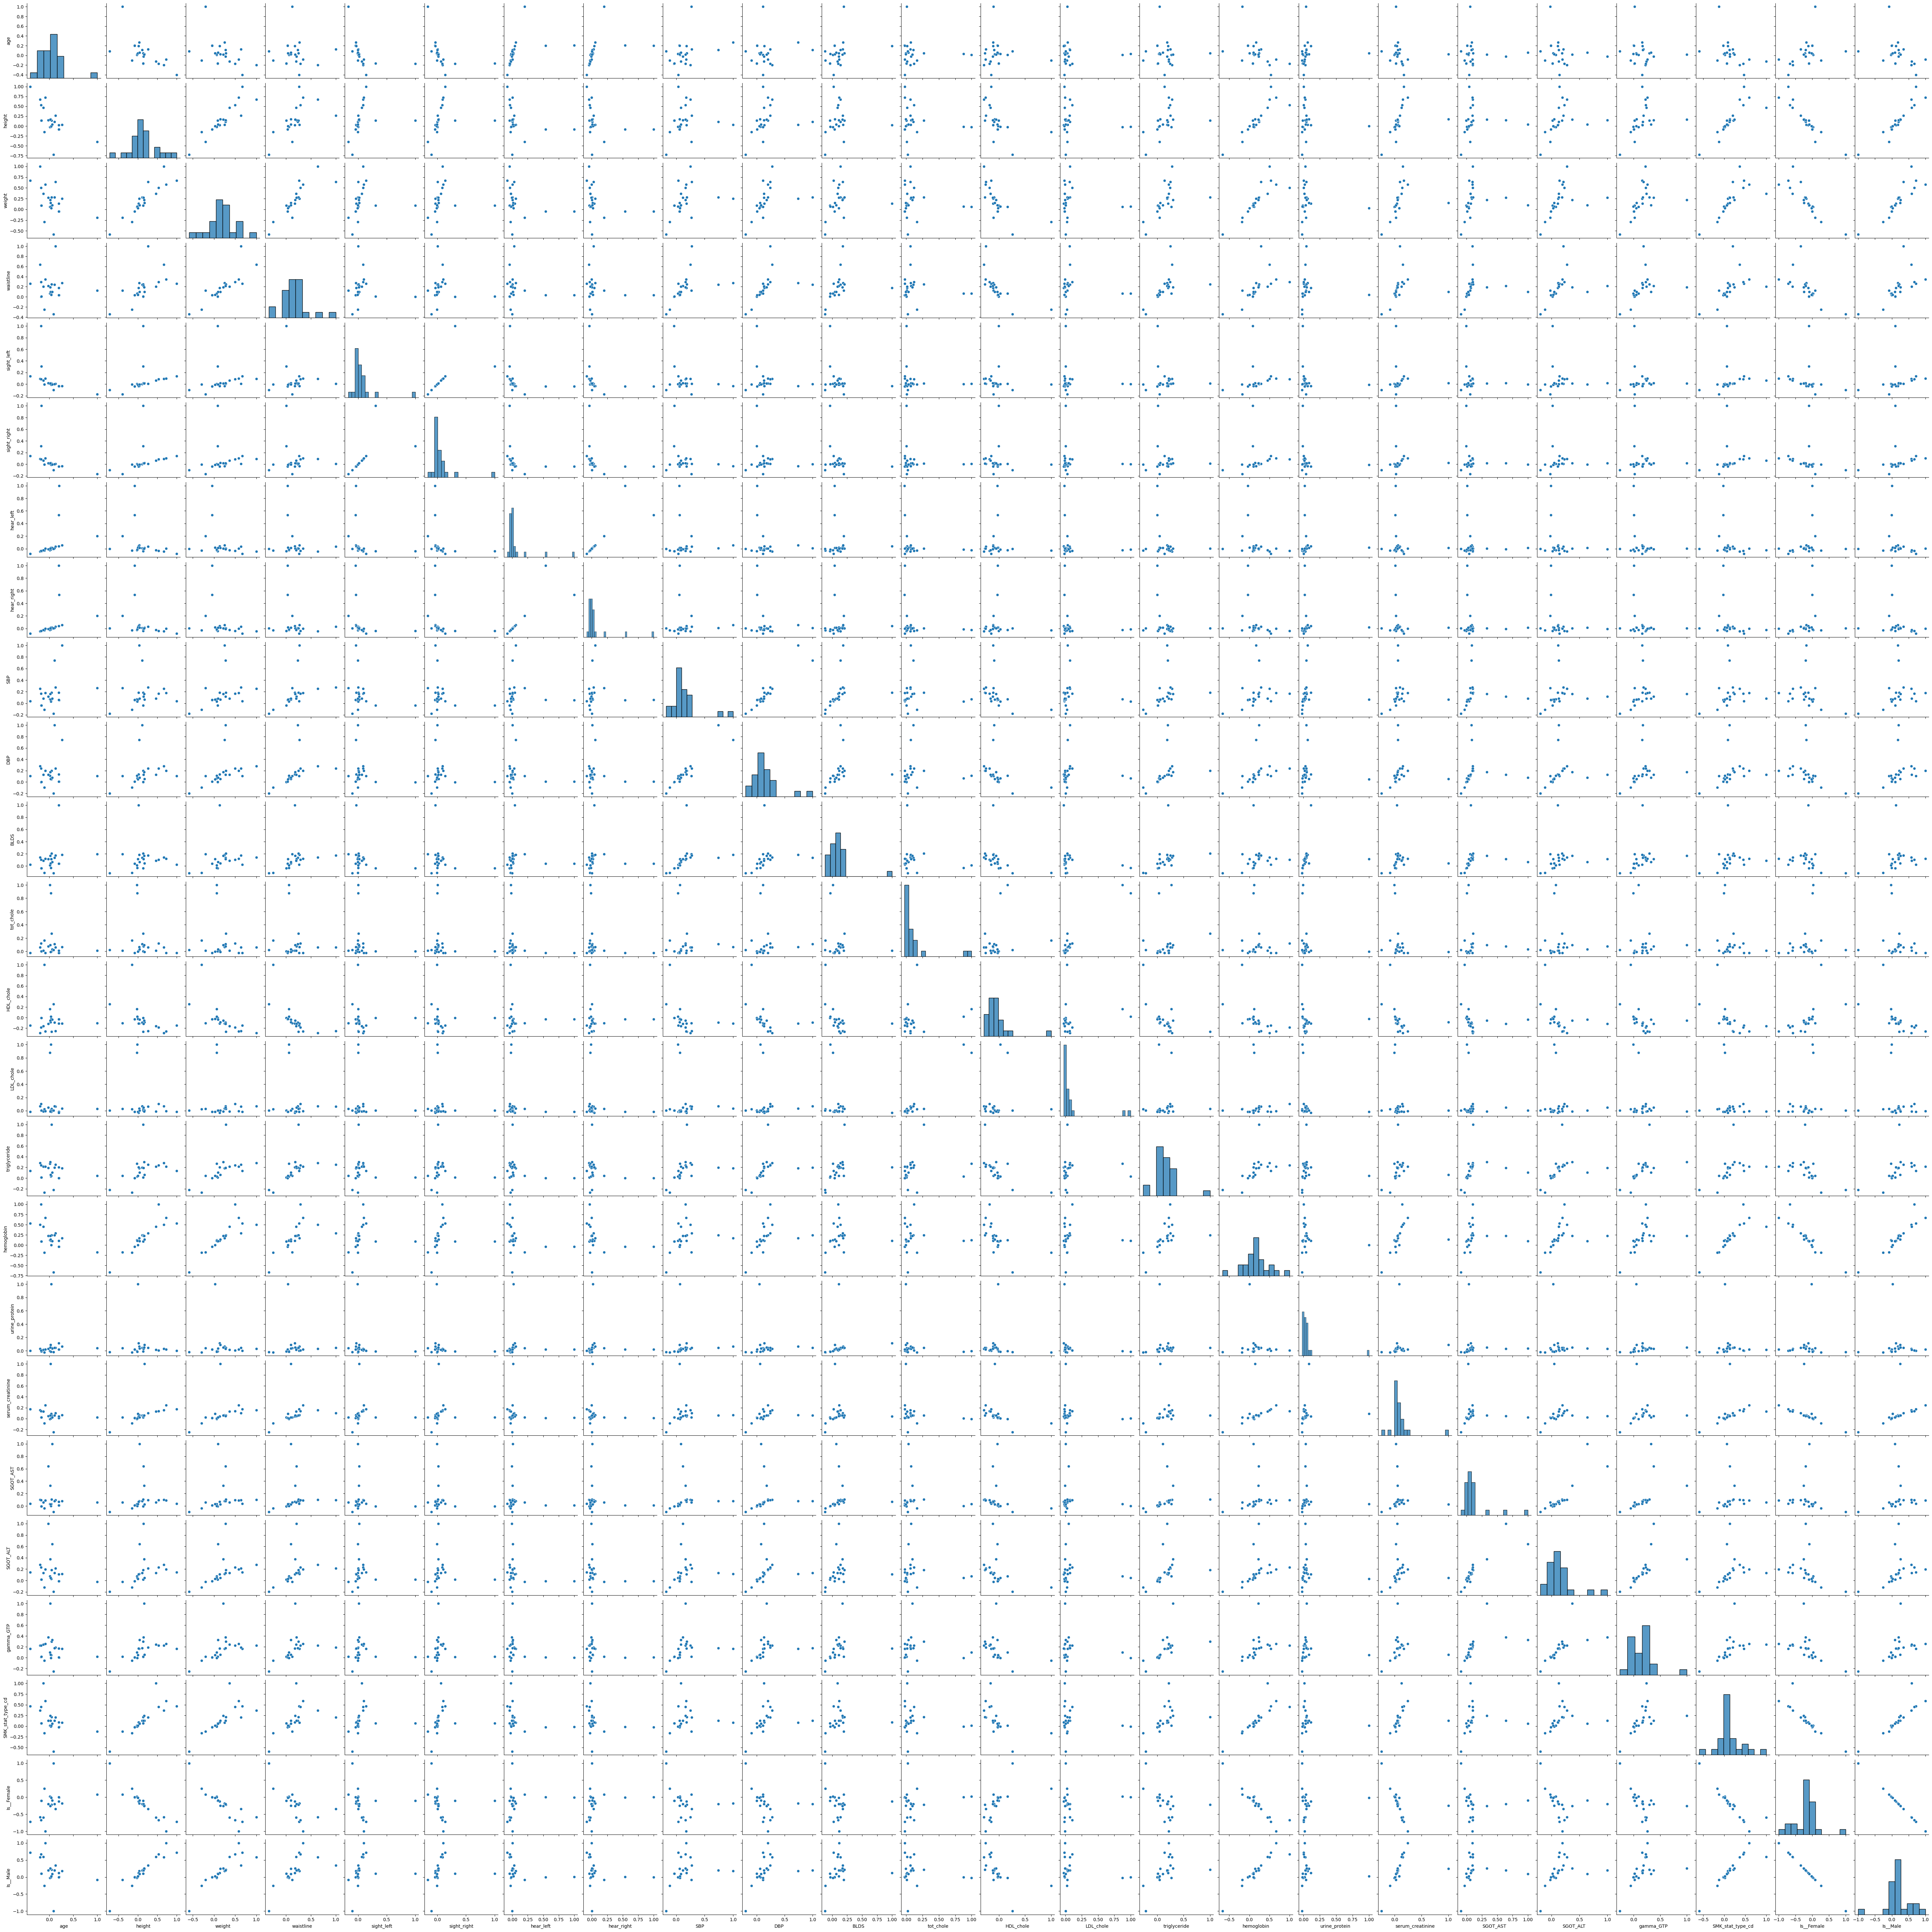

In [116]:
sns.pairplot(df.corr())